Prerequisites
--------
------------

Registration number: 191910

Alpha = 1 + mod(910,4)

Alpha = 3

In [ ]:
# Import Statements
import numpy as np
import pandas as pd
import scipy as sc
import math
from matplotlib import pyplot as plt
from scipy.io import wavfile
from scipy import signal as sg
from IPython.display import Audio

In [ ]:
# Alpha  = 1 + mod(910,4)
alpha = 1 + (910%4)

In [ ]:
# This is because I'm using Google Colab Noteboook 
# So please don't run this without mounting the drive
from google.colab import drive
drive.mount('/content/drive')
%cd drive/My\ Drive/DSP\ LAB/Experiment\ 3

Mounted at /content/drive
/content/drive/My Drive/DSP LAB/Experiment 3


Problem  #1
-----
-----

In [ ]:
# Function to plot the magnitude spectrum of a signal using the FFT function
def mag_spec(f_s, signal, title=None, logarithm=None, plot=True):
  mg = np.log10(np.abs(np.fft.fft(signal))) if logarithm else np.abs(np.fft.rfft(signal))
  freq = np.linspace(0, f_s/2, len(mg))
  if plot:
    m_fig, m_axes = plt.subplots(1, figsize=(18, 9))
    if logarithm:
      m_axes.grid(True)
    m_fig.tight_layout(pad=4)
    m_axes.plot(freq, mg)
    m_axes.set_title("Magnitude Spectrum of "+title, fontsize=18)
    m_axes.set_xlabel('$\Omega(in\ Hz)$', fontsize=16)
    m_axes.set_ylabel(r'$|X(\Omega)|\ (in\ dB)$' if logarithm else r'$|X(\Omega)|$', fontsize=16)
  return mg, freq
piano_fs, piano = wavfile.read('piano3.wav')
trumpet_fs, trumpet = wavfile.read('trumpet3.wav')
violin_fs, violin = wavfile.read('violin3.wav')
flute_fs, flute = wavfile.read('flute3.wav')

In [ ]:
trumpet_ms, trumpet_freq = mag_spec(trumpet_fs, trumpet, 'Trumpet',plot= False)
violin_ms, violin_freq = mag_spec(violin_fs, violin, 'Violin',plot = False)
piano_ms, piano_freq = mag_spec(piano_fs, piano, 'Piano',plot = False)
flute_ms, flute_freq = mag_spec(flute_fs, flute, 'Flute',plot = False)

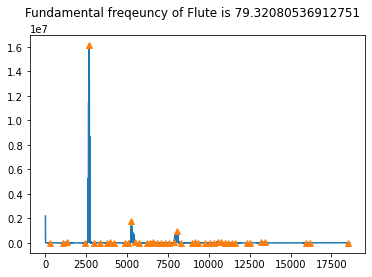

Fundamental Frequency is 79.32080536912751


In [ ]:
def peak_plotter(ms, freq, height, threshold, distance, ins, plot = False):
  peaks, _ = sg.find_peaks(ms, height, threshold, distance)
  plt.plot(ms)
  plt.plot(peaks, ms[peaks], "^")
  plt.suptitle('Fundamental freqeuncy of '+ins+' is '+str(freq[peaks[0]]))
  if plot==True:
   plt.show()
  return peaks
flute_peak = peak_plotter(flute_ms, flute_freq, 10000, 1000, 200, "Flute",plot=True)
print("Fundamental Frequency is "+str(flute_freq[flute_peak[0]]))

Fundamental Frequency is 129.2931818181818


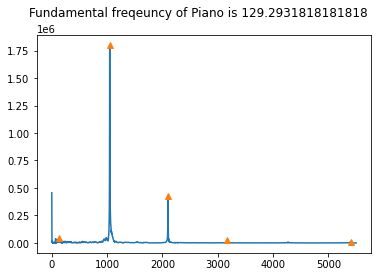

In [ ]:
piano_peak = peak_plotter(piano_ms, piano_freq, 10000, 1000, 200, "Piano")
print("Fundamental Frequency is "+str(piano_freq[piano_peak[0]]))

Fundamental Frequency is 6.749228659581761


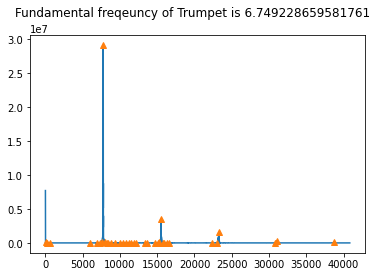

In [ ]:
trumpet_peak = peak_plotter(trumpet_ms, trumpet_freq, 10000, 1000, 200, "Trumpet")
print("Fundamental Frequency is "+str(trumpet_freq[trumpet_peak[0]]))

Fundamental Frequency is 67.00909090909092


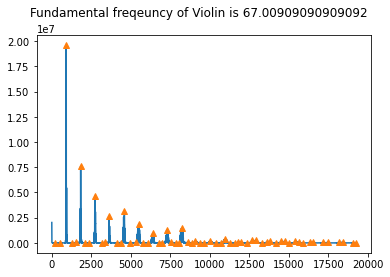

In [ ]:
violin_peak = peak_plotter(violin_ms, violin_freq, 10000, 1000, 200, "Violin")
print("Fundamental Frequency is "+str(violin_freq[violin_peak[0]]))

(array([6.34215966, 5.11603428, 4.95258767, ..., 4.81910667, 4.95258767,
        5.11603428]),
 array([0.00000000e+00, 1.47990550e-01, 2.95981100e-01, ...,
        5.51220402e+03, 5.51235201e+03, 5.51250000e+03]))

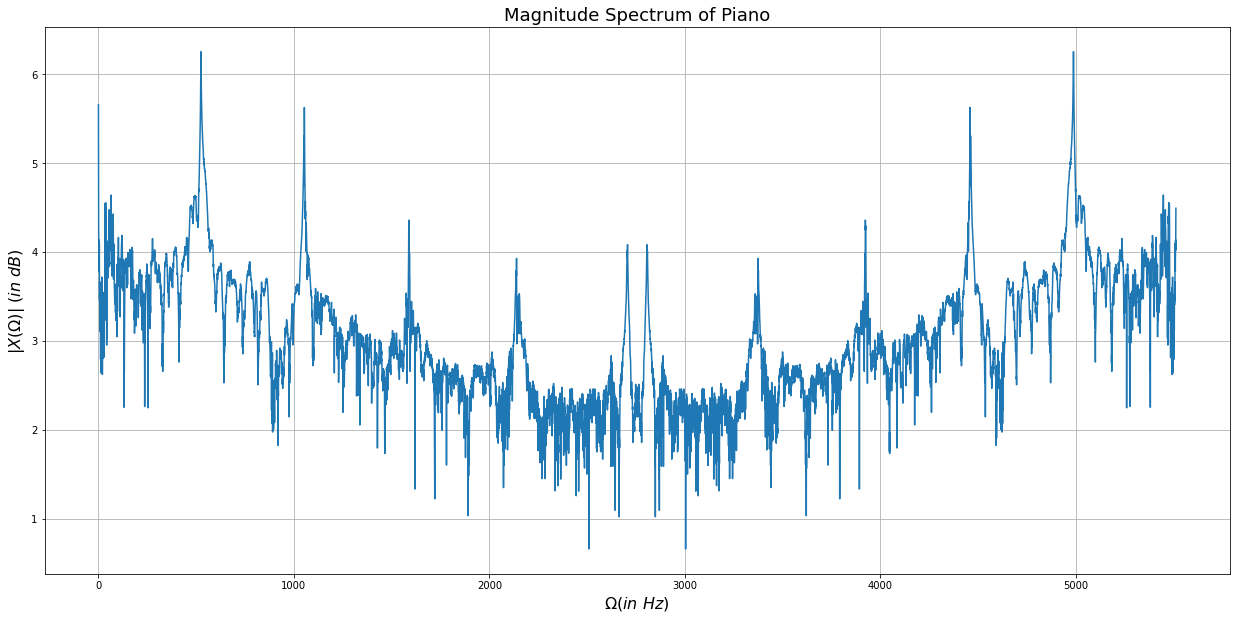

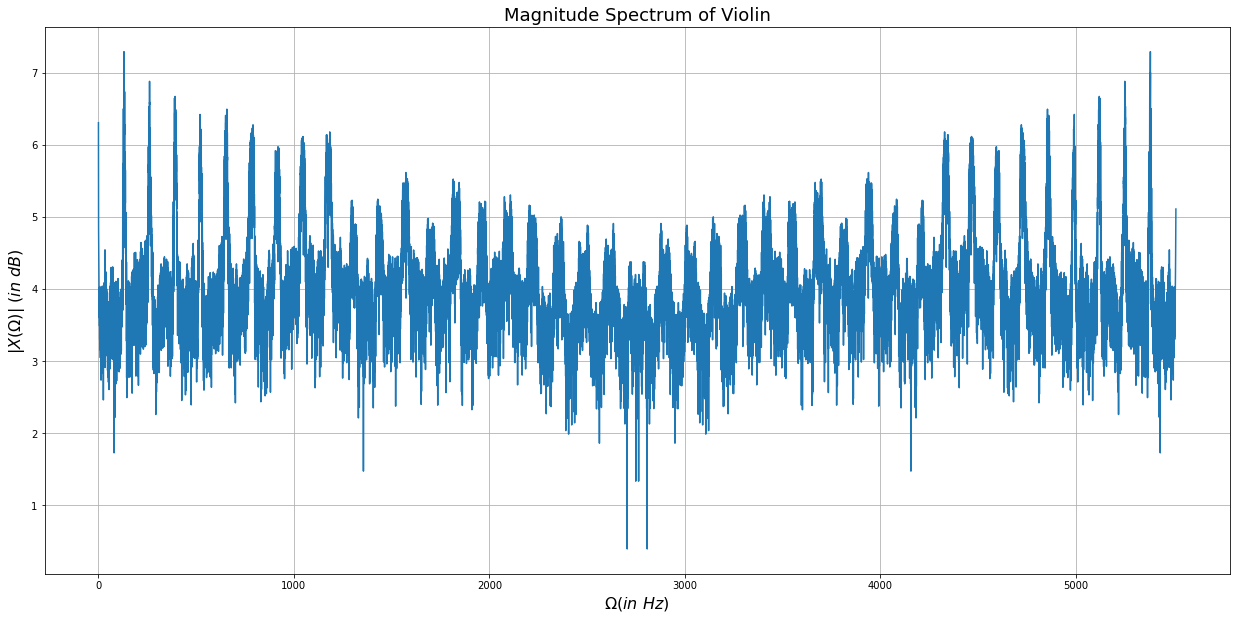

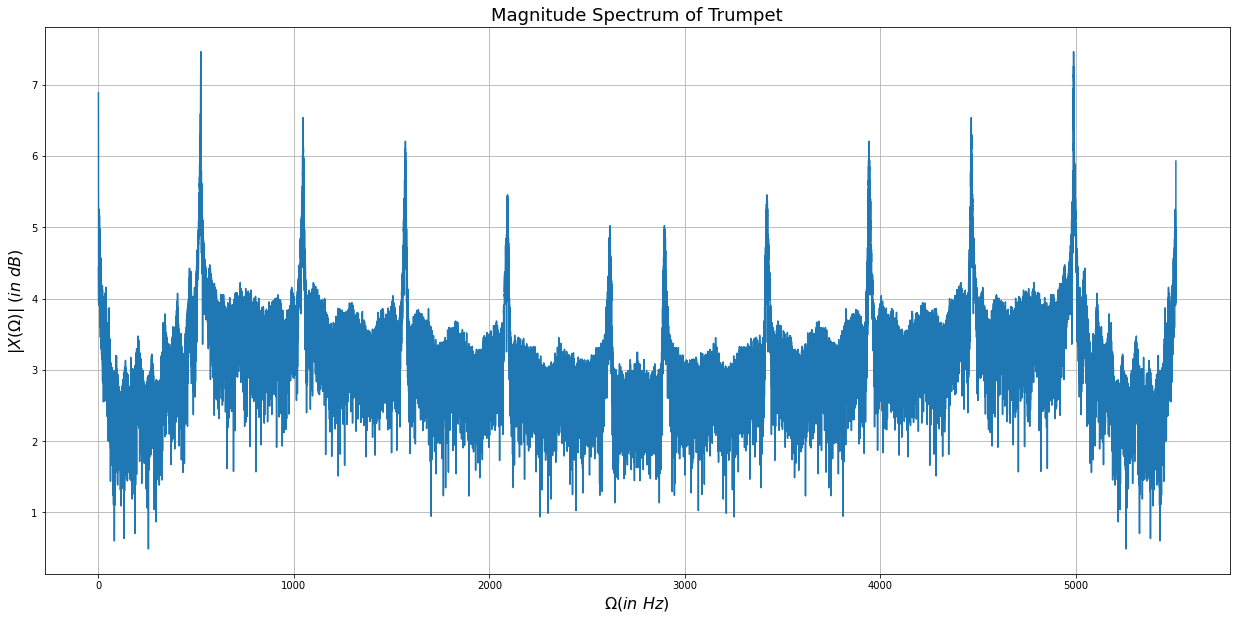

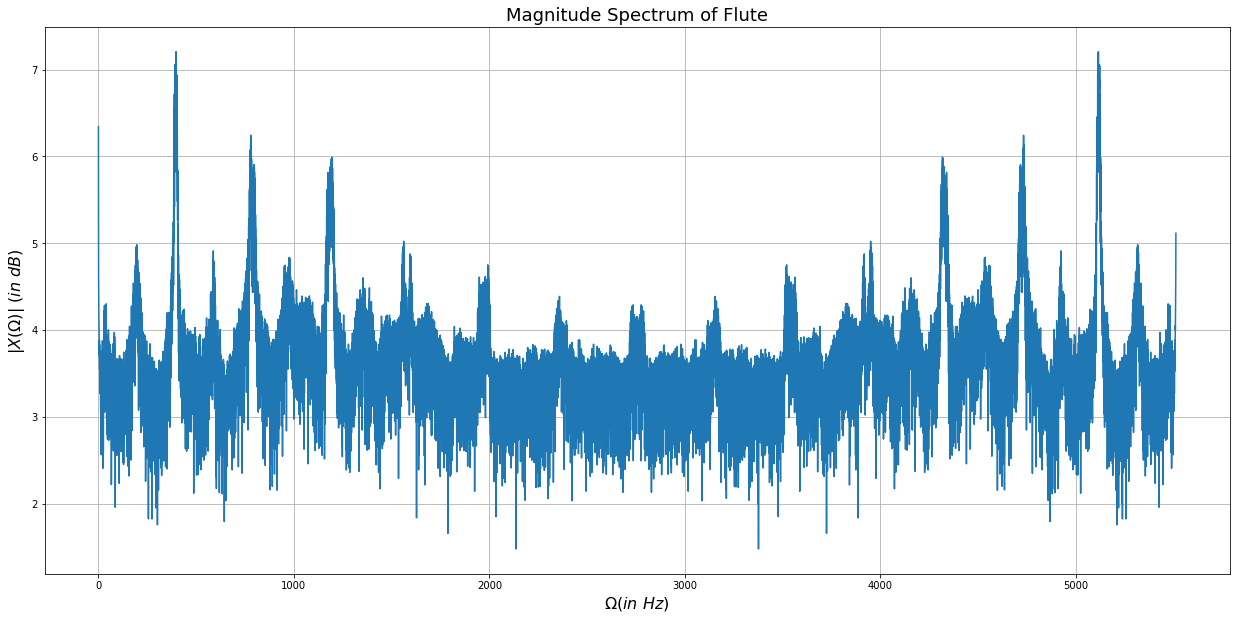

In [ ]:
# All 4 magnitude spectrum plots for each instrument with alpha 3
mag_spec(piano_fs, piano, 'Piano', logarithm=True)
mag_spec(violin_fs, violin, 'Violin', logarithm=True)
mag_spec(trumpet_fs, trumpet, 'Trumpet', logarithm=True)
mag_spec(flute_fs, flute, 'Flute', logarithm=True)

Question 2

In [ ]:
# All 4 flutes
flute1_fs, flute1 = wavfile.read('flute1.wav')
flute2_fs, flute2 = wavfile.read('flute2.wav')
flute3_fs, flute3 = wavfile.read('flute3.wav')
flute4_fs, flute4 = wavfile.read('flute4.wav')
# Mag Spectrum
flute1_ms, flute1_freq = mag_spec(flute1_fs, flute1, 'Flute 1', plot=False)
flute2_ms, flute2_freq = mag_spec(flute2_fs, flute2, 'Flute 2', plot=False)
flute3_ms, flute3_freq = mag_spec(flute3_fs, flute3, 'Flute 3', plot=False)
flute4_ms, flute4_freq = mag_spec(flute4_fs, flute4, 'Flute 4', plot=False)
# The alpha piano file
piano_fs, piano = wavfile.read('piano3.wav')
piano_ms, piano_freq = mag_spec(piano_fs, piano, 'Piano 3', plot=False)
piano_peaks, _ = sg.find_peaks(piano_ms, height=100000, threshold=10000, distance=200)
# Getting the peak vectors 
flute1_peaks, _ = sg.find_peaks(flute1_ms, height=1000000, threshold=1000, distance=600)
flute2_peaks, _ = sg.find_peaks(flute2_ms, height=100000, threshold=1000, distance=600)
flute3_peaks, _ = sg.find_peaks(flute3_ms, height=1000000, threshold=1000, distance=600)
flute4_peaks, _ = sg.find_peaks(flute4_ms, height=1000000, threshold=1000, distance=600)
flute_matcher = np.asarray([flute1_freq[flute1_peaks[0]],flute2_freq[flute2_peaks[0]], flute3_freq[flute3_peaks[0]]],flute4_freq[flute4_peaks[0]])
piano_matcher = piano_freq[piano_peaks[0]]
flute_beta = np.abs((flute_matcher - piano_matcher)).argmin() + 1
print('\u03B2 = ' + str(flute_beta))
print("Fundamental Frequency of piano" +str(alpha)+".wav (i.e piano\u03B1.wav) is "+str(piano_matcher))
print("Fundamental Frequency of flute" +str(flute_beta)+".wav (i.e piano\u03B2.wav) is "+str(flute1_freq[flute1_peaks[0]]))
print("So Flute"+str(flute_beta)+".wav is closest to piano"+str(alpha)+".wav in terms of the fundamental frequency")

β = 1
Fundamental Frequency of piano3.wav (i.e pianoα.wav) is 1048.3772727272726
Fundamental Frequency of flute1.wav (i.e pianoβ.wav) is 1063.2
So Flute1.wav is closest to piano3.wav in terms of the fundamental frequency


Problem  #2
-----
-----

Question 1

In [ ]:
# My 3 sec whistle is going to be imported and read from the gdrive
# key_whistle.wav is the file that I will use as the key
key_fs, key_signal = wavfile.read('Whistle Inputs/key_whistle.wav')
#key_signal = key_signal/32768.00

Question 2

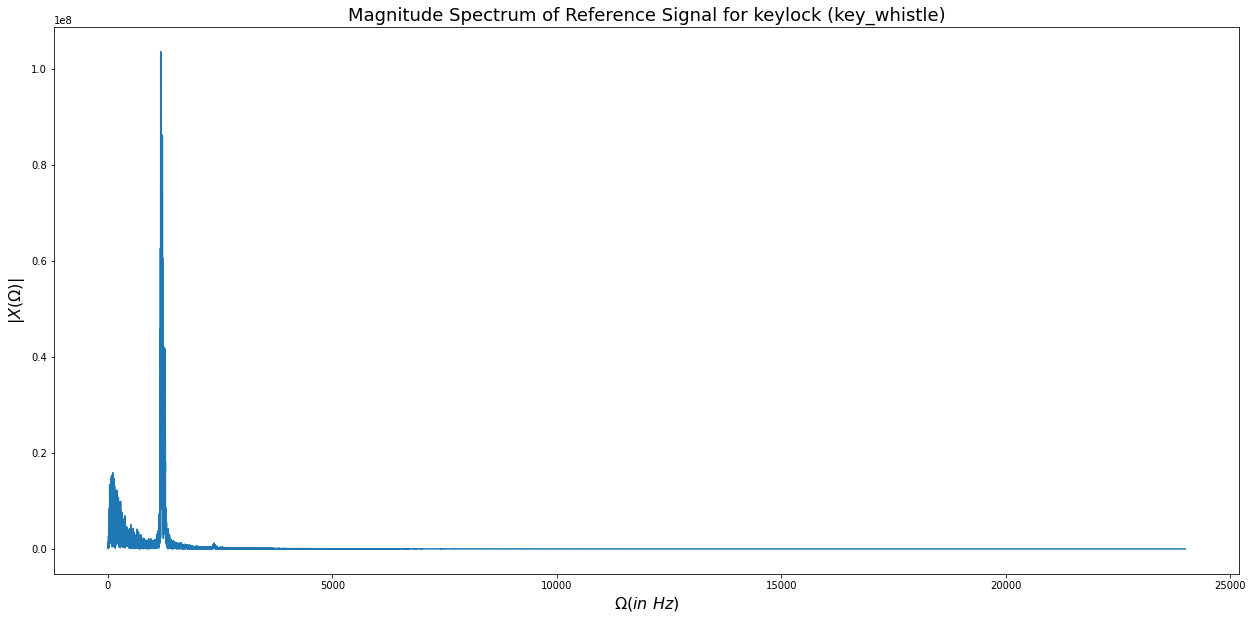

In [ ]:
# Spectrum Plotting
key_ms, key_freq = mag_spec(key_fs, key_signal, 'Reference Signal for keylock (key_whistle)')


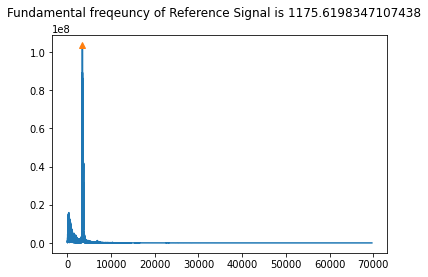

1175.6198347107438 is the fundamental frequency for the key i.e Reference Signal


In [ ]:
# Peak Picking
key_peaks = peak_plotter(key_ms,key_freq, 20000000, 100000, 1000, "Reference Signal",plot = True)
key_funda_freq = key_freq[key_peaks[0]]
print(str(key_funda_freq)+" is the fundamental frequency for the key i.e Reference Signal")

Question 3

In [ ]:
# To record 
RECORD = """
const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

# Function that validates the key 
def lock(key_funda_freq, test_funda_freq):
  diff = 0.05 * key_funda_freq
  max_err = key_funda_freq + diff
  min_err = key_funda_freq - diff
  if (min_err) <= test_funda_freq and test_funda_freq <= (max_err):
    op ='ACCESS GRANTED'
  else:
    op = 'ACCESS DENIED'
  return op

# Function to convert from .ogg to .wav
def convert_ogg_to_wav(filename='reference.wav', fs=44100, output=None):
  audio = AudioSegment.from_file(filename)
  audio = audio.set_frame_rate(fs).set_channels(1)
  audio.export(output if output else 'output_%d.wav' %(fs), format="wav")

# Function that records, then converts to .wav, then call the lock function to check for validation
def record(key_funda_freq,sec=3, filename='reference.wav'):
  try:
    from google.colab import output
  except ImportError:
    print('Not possible to import output from google.colab')
    return ''
  else:
    print('Recording')
    display(Javascript(RECORD))
    s = output.eval_js('record(%d)' % (sec*1000))
    print('Saving to', filename)
    b = b64decode(s.split(',')[1])
    with open(filename, 'wb') as f:
      f.write(b)
    convert_ogg_to_wav(filename, output='test_case_output.wav')
    test_fs, test_signal = wavfile.read('test_case_output.wav')
    test_signal = test_signal / 32768.0                         # Normalisation of the signal between -1 to 1
    test_ms, test_freq = mag_spec(test_fs, test_signal, 'Test\ Case')
    test_peaks = peak_plotter(test_ms, test_freq, 10000000, 10000000, 1000, "Test_Case")
    test_funda_freq = test_freq[test_peaks[0]]
    print(lock(key_funda_freq, test_funda_freq))
    return 

ACCESS DENIED
161.66666666666666


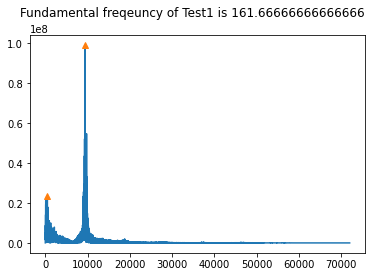

In [ ]:
# Test cases
test1_fs , test1_signal = wavfile.read('Whistle Inputs/test_whistle1.wav')
test2_fs , test2_signal = wavfile.read('Whistle Inputs/test_whistle1.wav')
test3_fs , test3_signal = wavfile.read('Whistle Inputs/test_whistle1.wav')
test1_ms, test1_freq = mag_spec(test1_fs, test1_signal, 'Test1',plot=False)
test1_peaks = peak_plotter(test1_ms, test1_freq, 10000000, 1000000, 1000, "Test1")
test1_funda_freq = test1_freq[test1_peaks[0]]
print(lock(key_funda_freq, test1_funda_freq))
#print(test1_funda_freq)

ACCESS DENIED


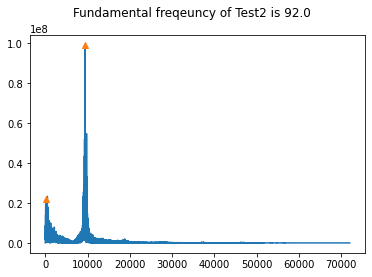

In [ ]:
test2_ms, test2_freq = mag_spec(test2_fs, test2_signal, 'Test2',plot = False)
test2_peaks = peak_plotter(test2_ms, test2_freq, 10000000, 2000000, 1000, "Test2")
test2_funda_freq = test2_freq[test2_peaks[0]]
print(lock(key_funda_freq, test2_funda_freq))
#print(test2_funda_freq)

ACCESS DENIED
92.0


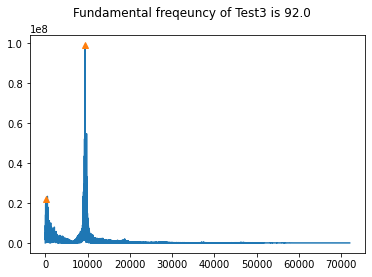

In [ ]:
test3_ms, test3_freq = mag_spec(test3_fs, test3_signal, 'Test3',plot=False)
test3_peaks = peak_plotter(test3_ms, test3_freq, 10000000, 3000000, 1000, "Test3")
test3_funda_freq = test3_freq[test3_peaks[0]]
print(lock(key_funda_freq, test3_funda_freq))
print(test3_funda_freq)

Problem  #3
-----
-----

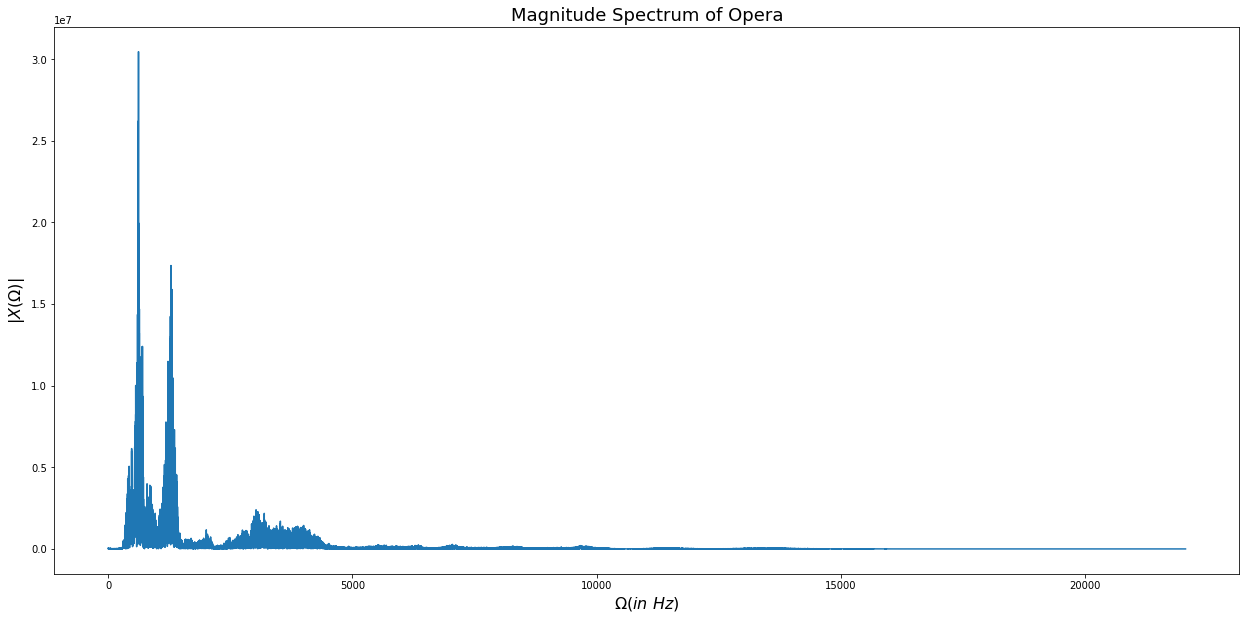

In [ ]:
opera_fs, opera_signal = wavfile.read('Opera.wav')
# Spectrum Plotting
opera_ms, opera_freq = mag_spec(opera_fs, opera_signal, 'Opera')

In [ ]:
# Size of the opera signal
print("Opera Signal samples = " + str(len(opera_signal))) 

Opera Signal samples = 220500


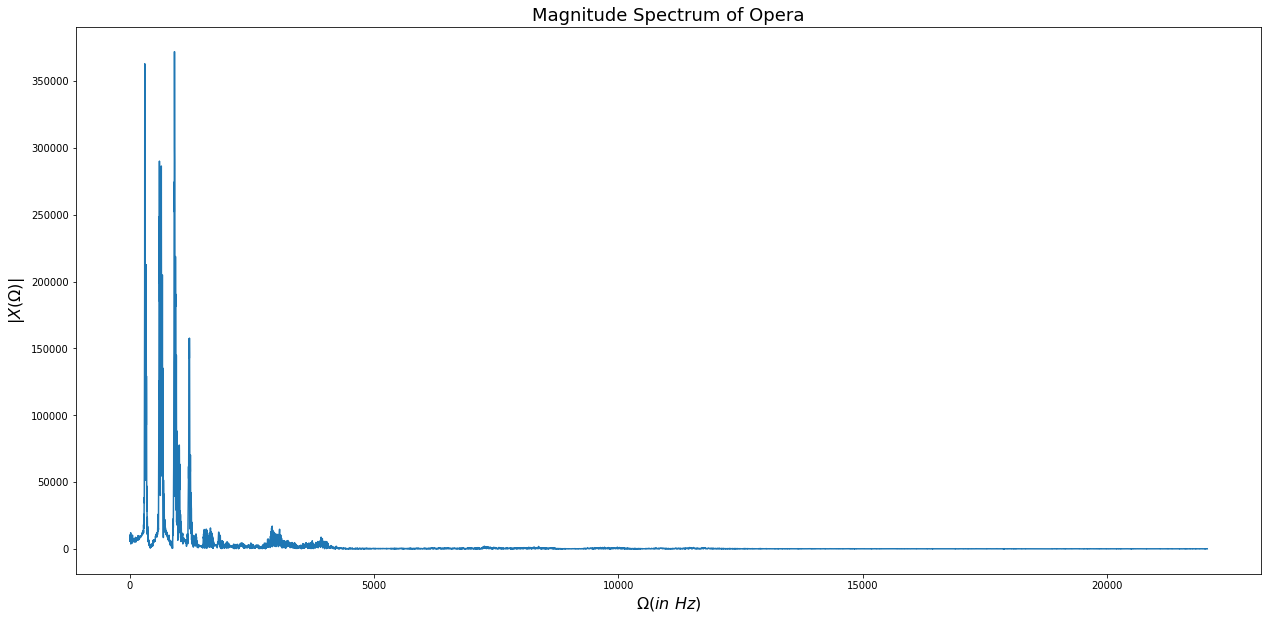

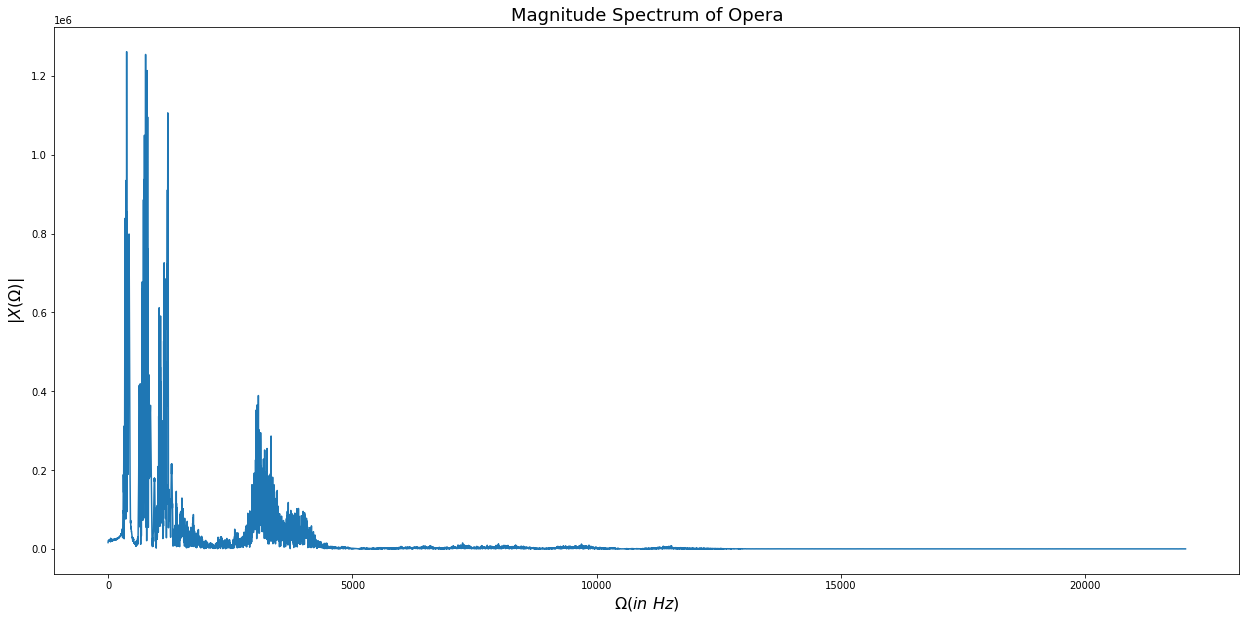

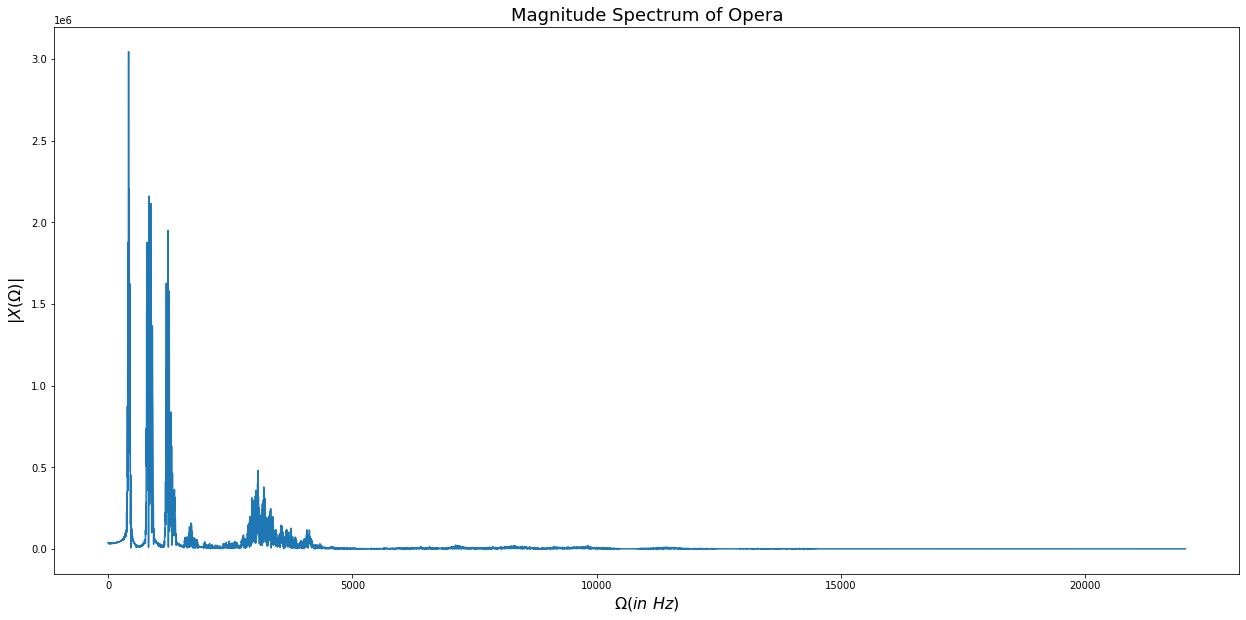

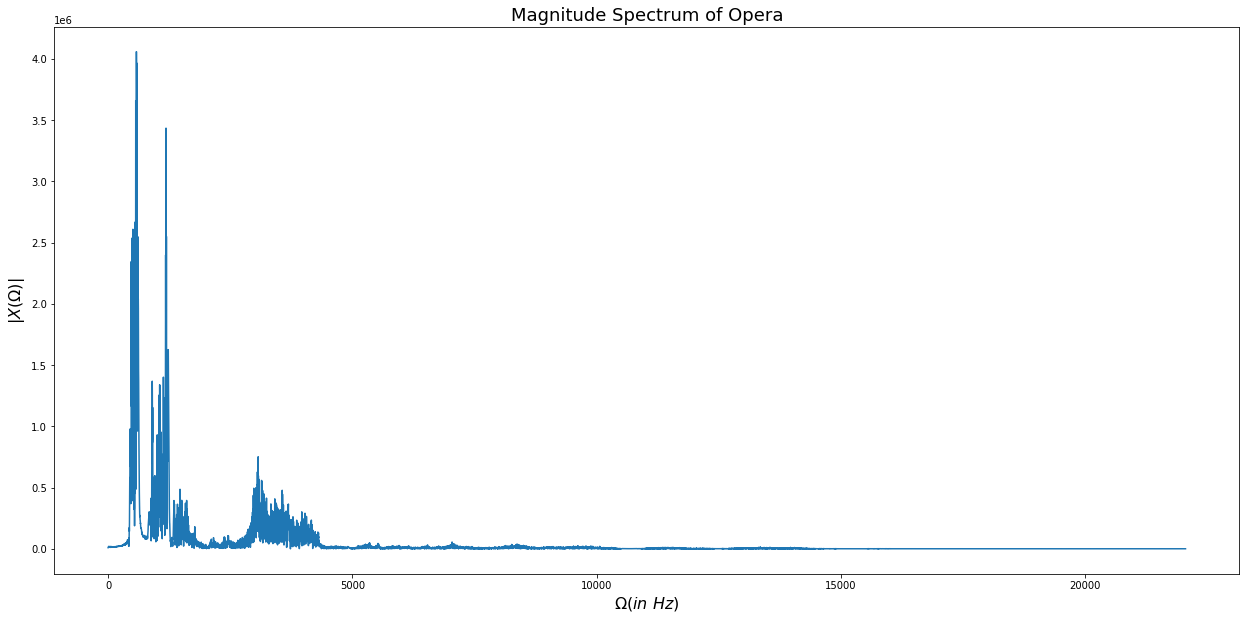

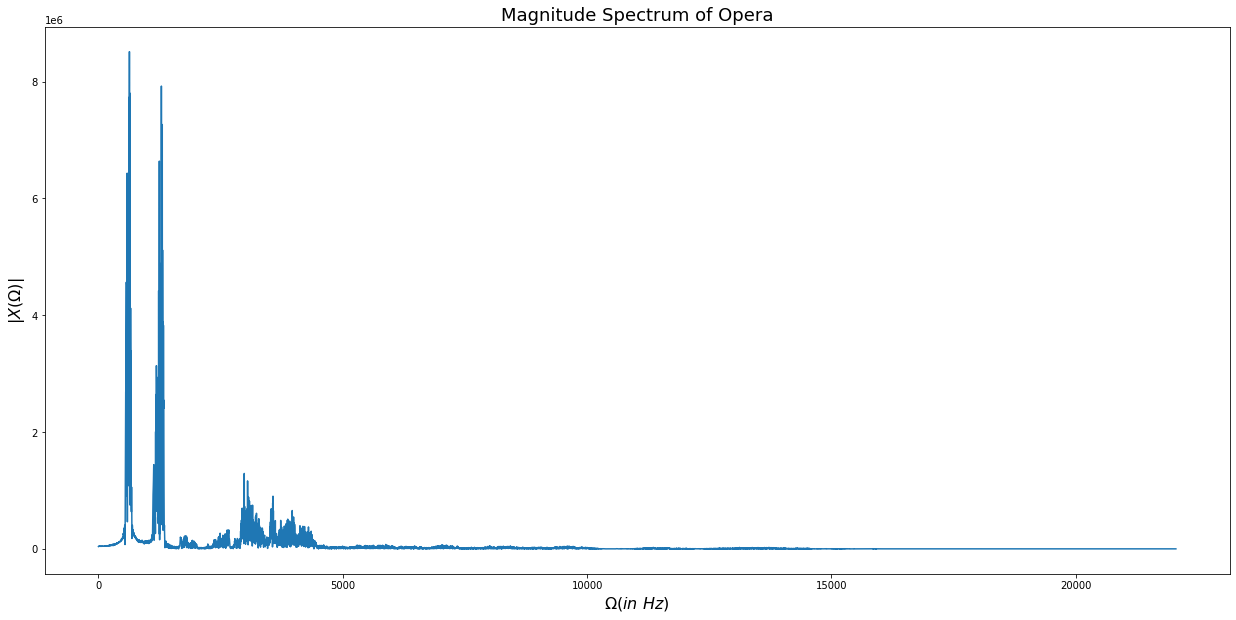

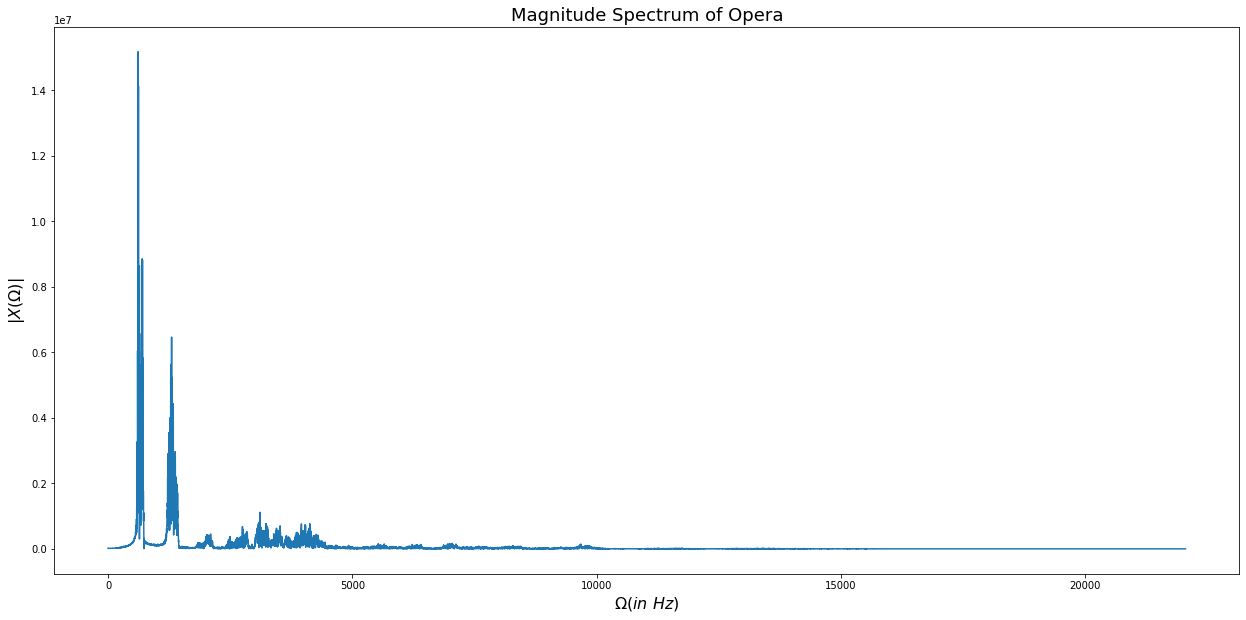

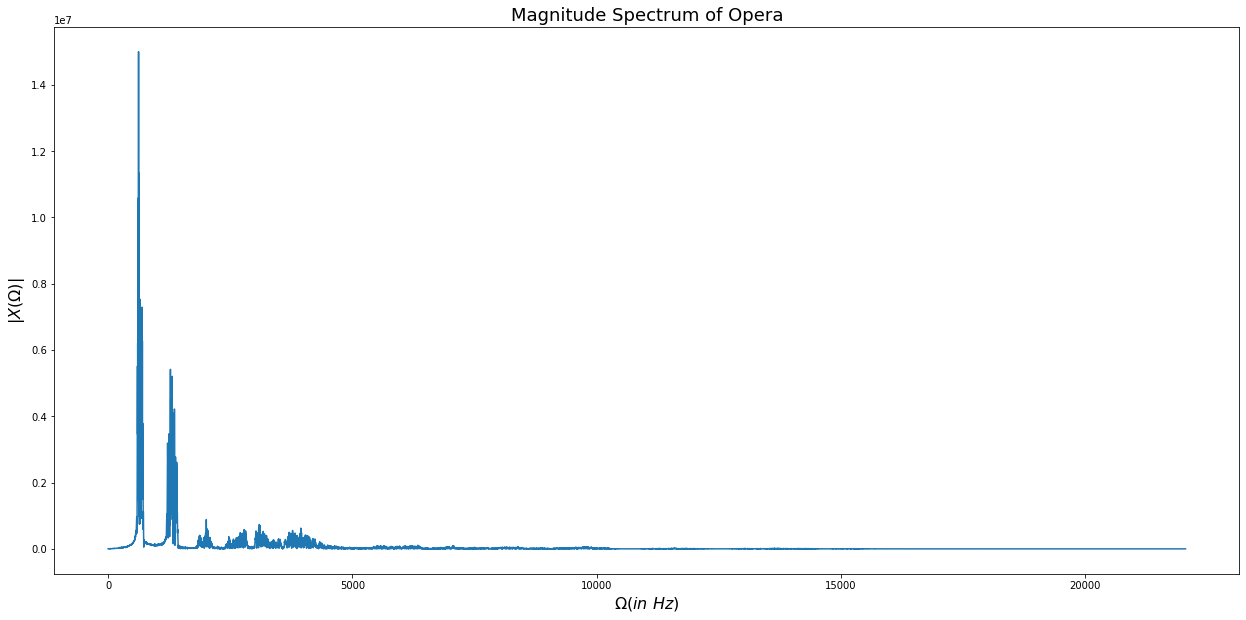

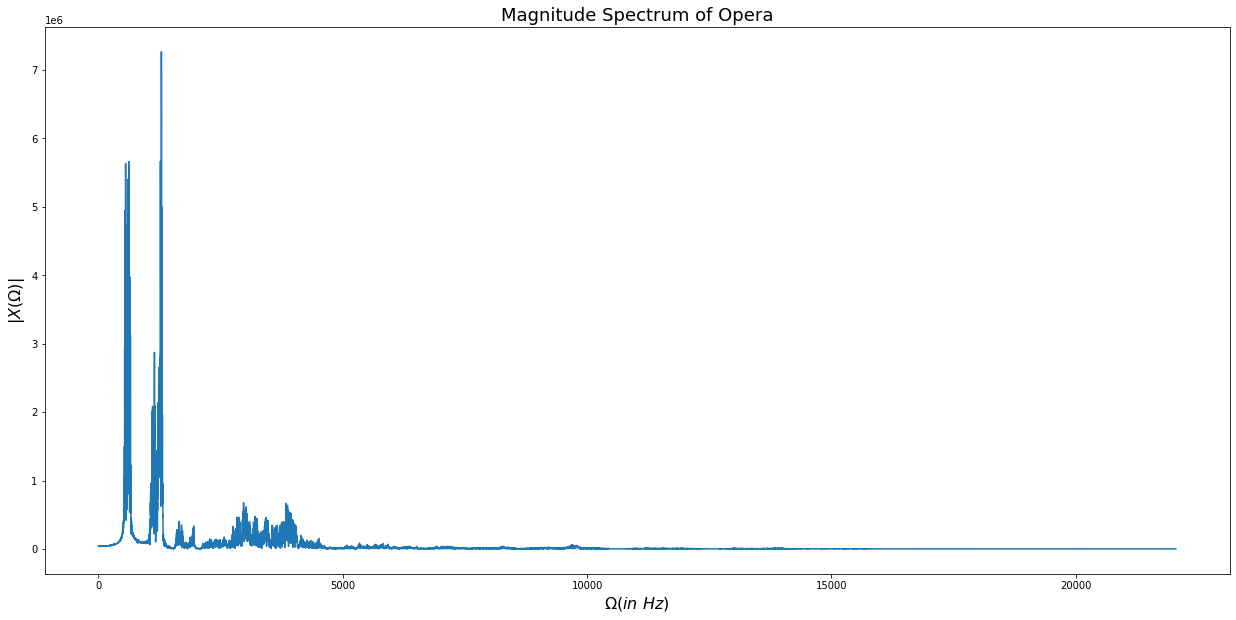

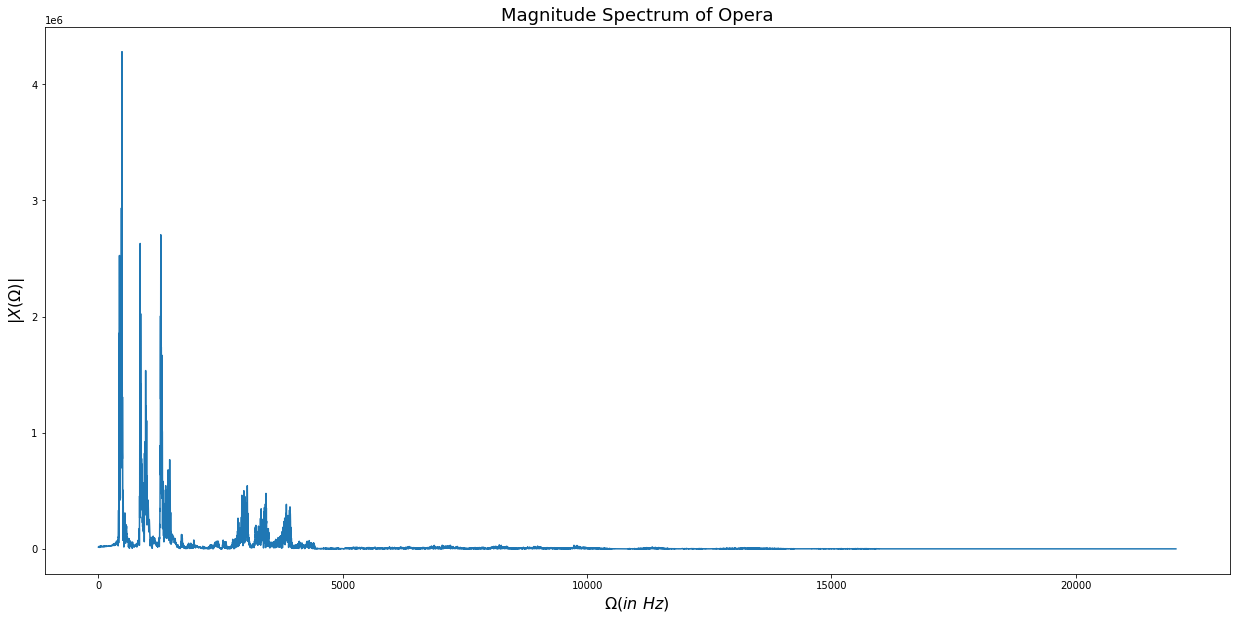

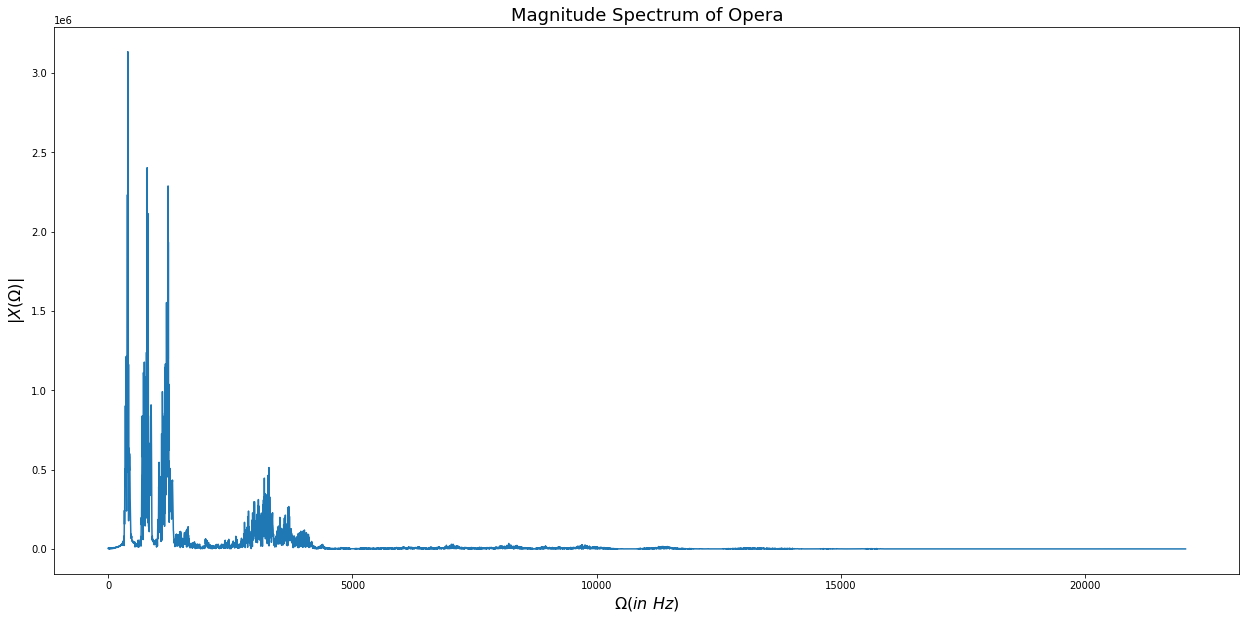

In [ ]:
opera_split = np.array_split(opera_signal, 10)
for i in range(10):
  ms, freq = mag_spec(opera_fs, opera_split[i], 'Opera')